In [79]:
from matplotlib.colors import ListedColormap

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

%matplotlib inline
# Make it pretty
plt.style.use('fivethirtyeight')
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [80]:
comp = pd.read_csv("men_main_21.1.csv", na_values=['?'])
comp.head()


ERROR! Session/line number was not unique in database. History logging moved to new session 150


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,first_name,lastname,Placing,country,continent,Age,affiliate,Height and Weight,points,21.1,21.1 time,21.2,21.2 time,21.3,21.3 time,21.4,weight,Unnamed: 18
0,0,JEFFRE,ADLER,1,Canada,North America,Age 27,CrossFit Wonderland,69 in | 197 lb,101.0,20th (11:55),605 reps,8th (9:14),225 reps,27th (8:15),180 reps,46th (317 lbs),Weight lifted: 317 lbs.,NaN
1,1,SCOTT,PANCHIK,2,United States,North America,Age 33,CrossFit Mentality,69 in | 187 lb,141.0,33rd (12:25),605 reps,47th (9:52),225 reps,5th (7:48),180 reps,56th (316 lbs),Weight lifted: 316 lbs.,NaN
2,2,TRAVIS,MEAD,3,United States,North America,Age 34,Iron Valley CrossFit,73 in | 205 lb,165.0,87th (13:02),605 reps,24th (9:38),225 reps,48th (8:26),180 reps,6th (345 lbs),Weight lifted: 345 lbs.,NaN
3,3,SAXON,PANCHIK,4,United States,North America,Age 25,CrossFit Cliffside,69 in | 180 lb,217.0,5th (11:25),605 reps,68th (9:59),225 reps,87th (8:41),180 reps,57th (316 lbs),Weight lifted: 316 lbs.,NaN
4,4,RICHARD,FRONING JR.,5,United States,North America,Age 33,CrossFit Mayhem,69 in | 194 lb,254.0,58th (12:45),605 reps,91st (10:04),225 reps,5th (7:48),180 reps,100th (312 lbs),Weight lifted: 312 lbs.,NaN


In [81]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137464 entries, 0 to 137463
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         137464 non-null  int64  
 1   first_name         137463 non-null  object 
 2   lastname           137456 non-null  object 
 3   Placing            137464 non-null  object 
 4   country            137464 non-null  object 
 5   continent          137464 non-null  object 
 6   Age                137464 non-null  object 
 7   affiliate          112681 non-null  object 
 8   Height and Weight  87327 non-null   object 
 9   points             137463 non-null  float64
 10  21.1               137464 non-null  object 
 11  21.1 time          8238 non-null    object 
 12  21.2               137462 non-null  object 
 13  21.2 time          65789 non-null   object 
 14  21.3               137461 non-null  object 
 15  21.3 time          15202 non-null   object 
 16  21

In [82]:
compHW = comp[['lastname','Placing','Age','Height and Weight']]

In [83]:
compHW

,lastname,Placing,Age,Height and Weight
0,ADLER,1,Age 27,69 in | 197 lb
1,PANCHIK,2,Age 33,69 in | 187 lb
2,MEAD,3,Age 34,73 in | 205 lb
3,PANCHIK,4,Age 25,69 in | 180 lb
4,FRONING JR.,5,Age 33,69 in | 194 lb
...,...,...,...,...
137459,NORTON,137351,Age 31,NaN
137460,DOUGHTY,137351,Age 32,NaN
137461,ROTT,137351,Age 46,NaN
137462,RICHARDS,137351,Age 39,76 in | 205 lb


In [84]:
type(compHW['Height and Weight'])

pandas.core.series.Series

In [85]:
HWdf = compHW['Height and Weight'].str.split('|', expand=True)

In [86]:
HWdf

,0,1
0,69 in,197 lb
1,69 in,187 lb
2,73 in,205 lb
3,69 in,180 lb
4,69 in,194 lb
...,...,...
137459,NaN,NaN
137460,NaN,NaN
137461,NaN,NaN
137462,76 in,205 lb


In [87]:
HWdf = HWdf.rename({0:'Height', 1:'Weight'}, axis = 1 )

In [88]:
HWdf

,Height,Weight
0,69 in,197 lb
1,69 in,187 lb
2,73 in,205 lb
3,69 in,180 lb
4,69 in,194 lb
...,...,...
137459,NaN,NaN
137460,NaN,NaN
137461,NaN,NaN
137462,76 in,205 lb


In [89]:
compHW

,lastname,Placing,Age,Height and Weight
0,ADLER,1,Age 27,69 in | 197 lb
1,PANCHIK,2,Age 33,69 in | 187 lb
2,MEAD,3,Age 34,73 in | 205 lb
3,PANCHIK,4,Age 25,69 in | 180 lb
4,FRONING JR.,5,Age 33,69 in | 194 lb
...,...,...,...,...
137459,NORTON,137351,Age 31,NaN
137460,DOUGHTY,137351,Age 32,NaN
137461,ROTT,137351,Age 46,NaN
137462,RICHARDS,137351,Age 39,76 in | 205 lb


In [90]:
compHW = compHW.drop('Height and Weight', axis = 1)

In [91]:
compHW

,lastname,Placing,Age
0,ADLER,1,Age 27
1,PANCHIK,2,Age 33
2,MEAD,3,Age 34
3,PANCHIK,4,Age 25
4,FRONING JR.,5,Age 33
...,...,...,...
137459,NORTON,137351,Age 31
137460,DOUGHTY,137351,Age 32
137461,ROTT,137351,Age 46
137462,RICHARDS,137351,Age 39


In [92]:
compHW = compHW.join(HWdf)

In [93]:
compHW.head(50)

,lastname,Placing,Age,Height,Weight
0,ADLER,1,Age 27,69 in,197 lb
1,PANCHIK,2,Age 33,69 in,187 lb
2,MEAD,3,Age 34,73 in,205 lb
3,PANCHIK,4,Age 25,69 in,180 lb
4,FRONING JR.,5,Age 33,69 in,194 lb
5,OHLSEN,6,Age 30,67 in,190 lb
6,COURNOYER,7,Age 25,180 cm,205 lb
7,GREASHABER,8,Age 21,72 in,206 lb
8,RICHELME,9,Age 24,173 cm,83 kg
9,LASCENKO,10,Age 23,175 cm,92 kg


In [94]:
agecompHW = compHW['Age'].apply(lambda x: "".join([char for char in str(x) if char.isnumeric()]))

In [95]:
compHW['Age2']=agecompHW

In [96]:
compHW = compHW.drop(labels = 'Age', axis = 1)

In [97]:
compHW = compHW.dropna(axis=0, how='any')

In [98]:
#compHW=compHW.reset_index()

In [99]:
#compHW = compHW.drop(labels = 'index', axis = 1)

In [100]:
compHW 

,lastname,Placing,Height,Weight,Age2
0,ADLER,1,69 in,197 lb,27
1,PANCHIK,2,69 in,187 lb,33
2,MEAD,3,73 in,205 lb,34
3,PANCHIK,4,69 in,180 lb,25
4,FRONING JR.,5,69 in,194 lb,33
...,...,...,...,...,...
137452,PESANT,137351,76 in,225 lb,44
137453,SCHMIDT,137351,180 cm,91 kg,29
137456,SUMNER,137351,73 in,215 lb,36
137457,SVITEK,137351,187 cm,83 kg,29


In [101]:
compHW = compHW[compHW["Height"].str.contains("cm")==False]

In [102]:
compHW = compHW[compHW["Weight"].str.contains("kg")==False]

In [103]:
compHW=compHW.reset_index()

In [104]:
compHW.head(50)

,index,lastname,Placing,Height,Weight,Age2
0,0,ADLER,1,69 in,197 lb,27
1,1,PANCHIK,2,69 in,187 lb,33
2,2,MEAD,3,73 in,205 lb,34
3,3,PANCHIK,4,69 in,180 lb,25
4,4,FRONING JR.,5,69 in,194 lb,33
5,5,OHLSEN,6,67 in,190 lb,30
6,7,GREASHABER,8,72 in,206 lb,21
7,10,LAPOINTE,11,69 in,187 lb,24
8,15,COLLINS,16,67 in,182 lb,30
9,17,MERTENS,18,64 in,185 lb,23


In [105]:
heightcompHW = compHW['Height'].apply(lambda x: "".join([char for char in str(x) if char.isnumeric()]))

In [106]:
compHW['Height2']=heightcompHW

In [107]:
weightcompHW = compHW['Weight'].apply(lambda x: "".join([char for char in str(x) if char.isnumeric()]))

In [108]:
compHW['Weight2']=weightcompHW

In [109]:
compHW = compHW.drop(labels = 'Height', axis = 1)

In [110]:
compHW = compHW.drop(labels = 'Weight', axis = 1)

In [111]:
compHW = compHW.drop(labels = 'index', axis = 1)

In [112]:
compHW = compHW.rename(columns={"Age2": "Age", "Height2": "Height", "Weight2":"Weight", "lastname":"Name"})

In [113]:
compHW['Placing'] = pd.to_numeric(compHW['Placing'])

In [114]:
compHW['Age'] = pd.to_numeric(compHW['Age'])

In [115]:
compHW['Height'] = pd.to_numeric(compHW['Height'])

In [116]:
compHW['Weight'] = pd.to_numeric(compHW['Weight'])

In [117]:
compHW.head(50)

,Name,Placing,Age,Height,Weight
0,ADLER,1,27,69,197
1,PANCHIK,2,33,69,187
2,MEAD,3,34,73,205
3,PANCHIK,4,25,69,180
4,FRONING JR.,5,33,69,194
5,OHLSEN,6,30,67,190
6,GREASHABER,8,21,72,206
7,LAPOINTE,11,24,69,187
8,COLLINS,16,30,67,182
9,MERTENS,18,23,64,185


In [118]:
compHW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43587 entries, 0 to 43586
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     43587 non-null  object
 1   Placing  43587 non-null  int64 
 2   Age      43587 non-null  int64 
 3   Height   43587 non-null  int64 
 4   Weight   43587 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


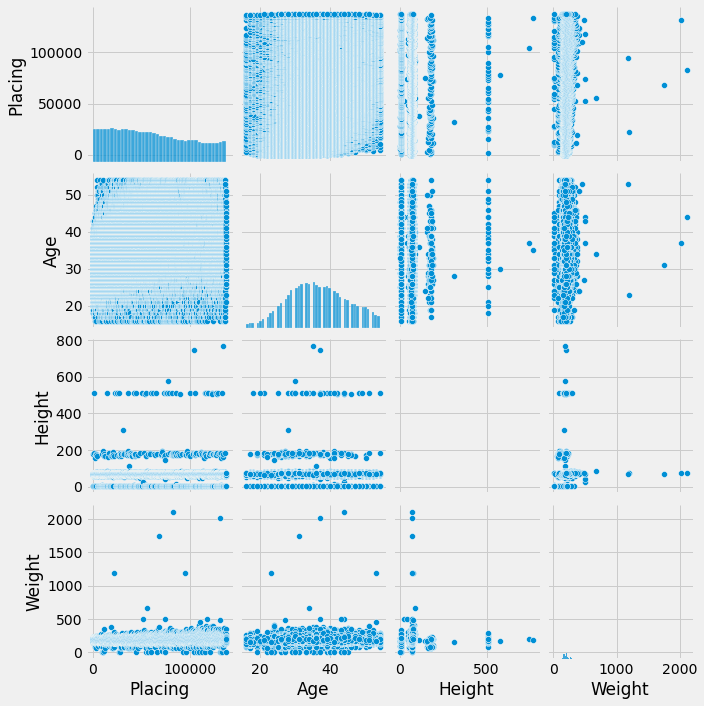

In [119]:
sns.pairplot(compHW)

In [120]:
#range1720_df = compHW.loc[(compHW['Age'] == '17') & 
                         #(compHW['Age'] == '18') & 
                         #(compHW['Age'] == '19')&
                         #(compHW['Age'] == '20')]

In [121]:
#range1720_df

In [122]:
#range1720_df = compHW['Age'].drop(lambda x: "".join([char for char in str(x) if char.isnumeric()]))

In [123]:
#compHW[compHW['Age'].isin([17,18,19,20])]

In [124]:
#compHW = compHW['Height'].isin(range([58,70]))

In [125]:
compHW = compHW[compHW['Height'].isin([61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80])]

In [126]:
compHW = compHW[compHW['Age'].isin([17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])]

In [127]:
compHW = compHW[compHW['Weight'].isin([129,
130,
131,
132,
133,
134,
135,
136,
137,
138,
139,
140,
141,
142,
143,
144,
145,
146,
147,
148,
149,
150,
151,
152,
153,
154,
155,
156,
157,
158,
159,
160,
161,
162,
163,
164,
165,
166,
167,
168,
169,
170,
171,
172,
173,
174,
175,
176,
177,
178,
179,
180,
181,
182,
183,
184,
185,
186,
187,
188,
189,
190,
191,
192,
193,
194,
195,
196,
197,
198,
199,
200,
201,
202,
203,
204,
205,
206,
207,
208,
209,
210,
211,
212,
213,
214,
215,
216,
217,
218,
219,
220,
221,
222,
223,
224,
225,
226,
227,
228,
229,
230,
231,
232,
233,
234,
235,
236,
237,
238,
239,
240,
241,
242,
243,
244,
245,
246,
247,
248,
249,
250,
251,
252,
253,
254,
255,
256,
257,
258,
259,
260,
261,
262,
263,
264,
265,
266,
267,
268,
269,
270,
271,
272,
273,
274,
275,])]

In [128]:
compHW['Height']

0        69
1        69
2        73
3        69
4        69
         ..
43580    71
43582    70
43583    66
43585    73
43586    76
Name: Height, Length: 28356, dtype: int64

In [129]:
compHW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28356 entries, 0 to 43586
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     28356 non-null  object
 1   Placing  28356 non-null  int64 
 2   Age      28356 non-null  int64 
 3   Height   28356 non-null  int64 
 4   Weight   28356 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ MB


In [130]:
compHW=compHW.reset_index()

In [131]:
compHW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28356 entries, 0 to 28355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    28356 non-null  int64 
 1   Name     28356 non-null  object
 2   Placing  28356 non-null  int64 
 3   Age      28356 non-null  int64 
 4   Height   28356 non-null  int64 
 5   Weight   28356 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [132]:
compHW = compHW.drop(labels = 'index', axis = 1)

In [133]:
compHW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28356 entries, 0 to 28355
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     28356 non-null  object
 1   Placing  28356 non-null  int64 
 2   Age      28356 non-null  int64 
 3   Height   28356 non-null  int64 
 4   Weight   28356 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ MB


In [134]:
compHW = compHW.head(5000)

In [135]:
compHW.describe()

,Placing,Age,Height,Weight
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,6798.935800,30.283600,70.020200,187.876000
std,4062.869893,5.013921,2.526236,17.336768
min,1.000000,17.000000,62.000000,130.000000
25%,3234.750000,27.000000,68.000000,175.000000
50%,6677.000000,30.000000,70.000000,187.000000
75%,10183.250000,34.000000,72.000000,200.000000
max,14057.000000,40.000000,80.000000,275.000000


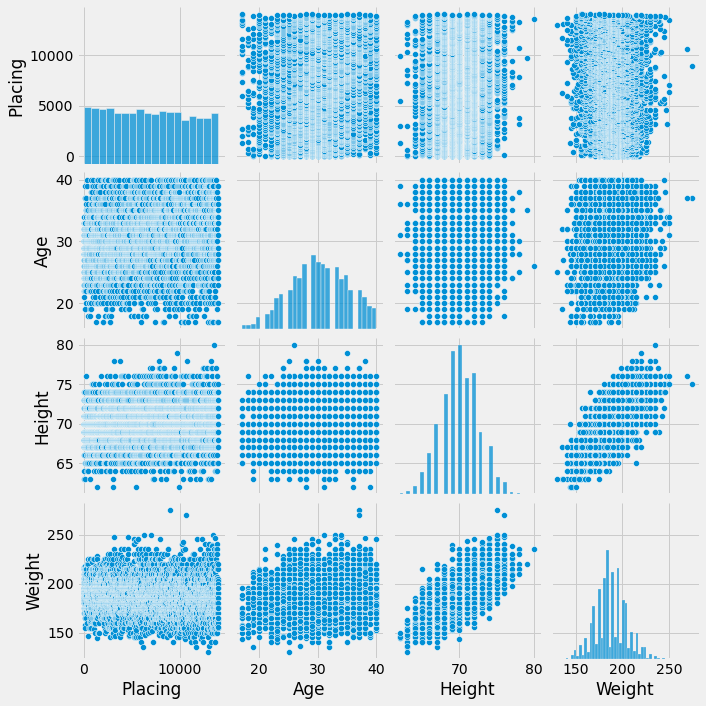

In [136]:
sns.pairplot(compHW)

In [137]:
range1720_df = compHW[compHW['Age'].isin([17,18,19,20])]

In [138]:
range1720_df[range1720_df['Height'].isin([72])]

,Name,Placing,Age,Height,Weight
49,PEPPER,95,19,72,212
165,KUC,391,18,72,175
932,FABRY,2398,20,72,205
1620,HALL,4281,20,72,200
1711,HEATH,4541,20,72,212
2283,REGISTER,6066,19,72,180
2745,GREB,7397,17,72,170
3724,MCQUEEN,10130,20,72,200
4332,PINETTE,12071,19,72,182
4548,PRAETZEL,12690,20,72,195


In [139]:
range1720_df['Height'].max()

76

In [140]:
range2127_df = compHW[compHW['Age'].isin([21,22,23,24,25,26,27])]

In [141]:
range2127_df

,Name,Placing,Age,Height,Weight
0,ADLER,1,27,69,197
3,PANCHIK,4,25,69,180
6,GREASHABER,8,21,72,206
7,LAPOINTE,11,24,69,187
9,MERTENS,18,23,64,185
...,...,...,...,...,...
4974,SCHUENKE,13976,25,71,205
4978,TURNER,13982,24,68,170
4991,CAMARENA,14030,27,65,155
4992,PAPPAS,14033,27,73,195


In [142]:
range2839_df = compHW[compHW['Age'].isin([28,29,30,31,32,33,34,35,36,37,38,39])]

In [143]:
range2839_df

,Name,Placing,Age,Height,Weight
1,PANCHIK,2,33,69,187
2,MEAD,3,34,73,205
4,FRONING JR.,5,33,69,194
5,OHLSEN,6,30,67,190
8,COLLINS,16,30,67,182
...,...,...,...,...,...
4995,BASTYR,14041,29,71,180
4996,WIECHEC,14044,37,68,165
4997,STILES,14047,35,67,165
4998,GLADDEN,14049,35,67,156


In [144]:
range2839_df.describe()

,Placing,Age,Height,Weight
count,3429.00000,3429.000000,3429.000000,3429.000000
mean,6999.76378,32.544474,70.059784,188.676874
std,4034.89660,3.199806,2.527258,17.562623
min,2.00000,28.000000,62.000000,135.000000
25%,3523.00000,30.000000,68.000000,176.000000
50%,7030.00000,32.000000,70.000000,188.000000
75%,10328.00000,35.000000,72.000000,200.000000
max,14057.00000,39.000000,79.000000,275.000000


compHW.info()

In [145]:
compHW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     5000 non-null   object
 1   Placing  5000 non-null   int64 
 2   Age      5000 non-null   int64 
 3   Height   5000 non-null   int64 
 4   Weight   5000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 195.4+ KB


In [146]:
y = compHW['Weight']
X = compHW[['Height']]
print(X)

      Height
0         69
1         69
2         73
3         69
4         69
...      ...
4995      71
4996      68
4997      67
4998      67
4999      72

[5000 rows x 1 columns]


In [147]:
model_linear = LinearRegression()
model_fit = model_linear.fit(X, y)
prediction = model_fit.predict(X)
print(prediction)

[183.09674171 183.09674171 201.83525687 ... 173.72748413 173.72748413
 197.15062808]


In [148]:
print(model_fit.intercept_, model_fit.coef_)

-140.14264487773337 [4.68462879]


In [149]:
#Model for CompHW DF
model_ols = smf.ols(formula = 'Weight ~ Height + Age', data=compHW)
result = model_ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     2213.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:45:06   Log-Likelihood:                -19773.
No. Observations:                5000   AIC:                         3.955e+04
Df Residuals:                    4997   BIC:                         3.957e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -145.9301      5.049    -28.903      0.0

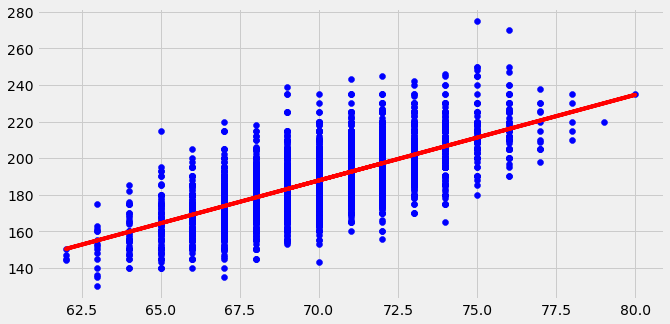

In [150]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(compHW.Height, y, color ='blue')
# xvals = np.linspace(650,850,2498)
ax.plot(X['Height'], prediction, color = 'red', label = 'simple')

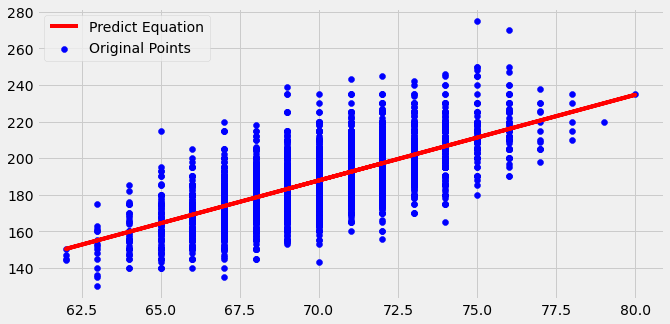

In [151]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(compHW.Height, y, color ='blue', label = 'Original Points')
# xvals = np.linspace(650,850,2498)
# ax.scatter(X['fico'], prediction, color = 'gray', label = 'Predict Points')
ax.plot(X['Height'], prediction, color = 'red', label = 'Predict Equation')
ax.legend()

In [152]:
compHW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     5000 non-null   object
 1   Placing  5000 non-null   int64 
 2   Age      5000 non-null   int64 
 3   Height   5000 non-null   int64 
 4   Weight   5000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 195.4+ KB


In [153]:
y_1 = range1720_df['Weight']
X_1 = range1720_df[['Height']]
print(X)

      Height
0         69
1         69
2         73
3         69
4         69
...      ...
4995      71
4996      68
4997      67
4998      67
4999      72

[5000 rows x 1 columns]


In [154]:
model_linear1 = LinearRegression()
model_fit1 = model_linear1.fit(X_1, y_1)
prediction1 = model_fit1.predict(X_1)
print(prediction1)

[189.48961012 198.72847444 184.87017797 189.48961012 184.87017797
 157.15358502 147.91472071 175.63131365 194.10904228 166.39244934
 175.63131365 175.63131365 161.77301718 175.63131365 175.63131365
 184.87017797 180.25074581 175.63131365 184.87017797 166.39244934
 175.63131365 171.01188149 175.63131365 194.10904228 152.53415286
 189.48961012 166.39244934 175.63131365 175.63131365 175.63131365
 180.25074581 175.63131365 175.63131365 166.39244934 184.87017797
 171.01188149 180.25074581 180.25074581 161.77301718 180.25074581
 175.63131365 180.25074581 189.48961012 180.25074581 175.63131365
 171.01188149 194.10904228 189.48961012 180.25074581 180.25074581
 180.25074581 171.01188149 157.15358502 171.01188149 171.01188149
 180.25074581 161.77301718 161.77301718 166.39244934 184.87017797
 189.48961012 180.25074581 166.39244934 166.39244934 180.25074581
 184.87017797 194.10904228 184.87017797 189.48961012 171.01188149
 184.87017797 184.87017797 161.77301718 184.87017797 161.77301718
 203.34790

In [155]:
print(model_fit1.intercept_, model_fit1.coef_)

-143.10950519493878 [4.61943216]


In [156]:
#Model for range1720_df
model_ols1 = smf.ols(formula = 'Weight ~ Height', data=range1720_df)
result1 = model_ols1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     118.8
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           3.11e-20
Time:                        15:45:08   Log-Likelihood:                -537.95
No. Observations:                 137   AIC:                             1080.
Df Residuals:                     135   BIC:                             1086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -143.1095     29.536     -4.845      0.0

In [236]:
ax = sns.regplot(x='Height', y='pred_mean', data=range1720_df, color='r', label='y_test_pred', ax=ax)
ax.fill_between(
    x=range1720_df['Height'],
    y1=range1720_df['pred_mean_ci_lower'],
    y2=range1720_df['pred_mean_ci_upper'],
    color='r', 
    alpha=0.5,
    label='Confidence Interval (obs_pred)'
)

KeyError: 'pred_mean'

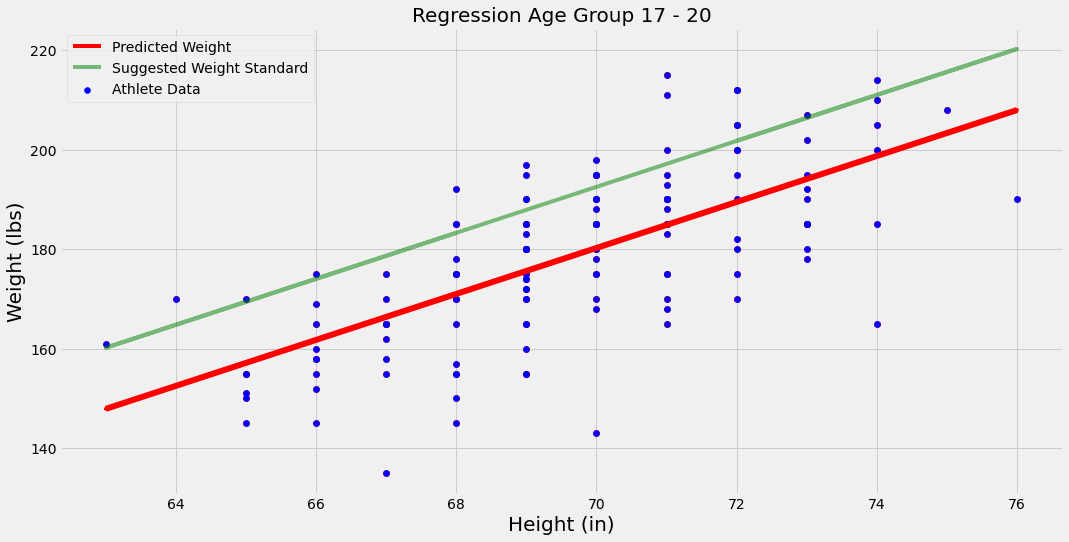

In [242]:
ax = sns.regplot(x=X_1, y=y_1, color="r", ci = 0)
ax.set_xlabel("Height (in)", fontsize = 20)
ax.set_ylabel("Weight (lbs)", fontsize = 20)
ax.set_title('Regression Age Group 17 - 20', fontdict={'fontsize':20})
ax.scatter(range1720_df.Height, y_1, color ='blue', label = 'Athlete Data')
ax.plot(X_1['Height'], prediction1, color = 'red', label = 'Predicted Weight')
ax.plot(X_1['Height'], prediction1 + 1 * stan, color = 'green', alpha = .5,label = 'Suggested Weight Standard')
#ax.fill_between(X_1['Height'], prediction1 + 1 * stan, prediction1, color = 'green' ,alpha = .5)
#ax.fill_between(X_1, y_est - y_err, y_est + y_err, alpha=0.2)
ax.legend()


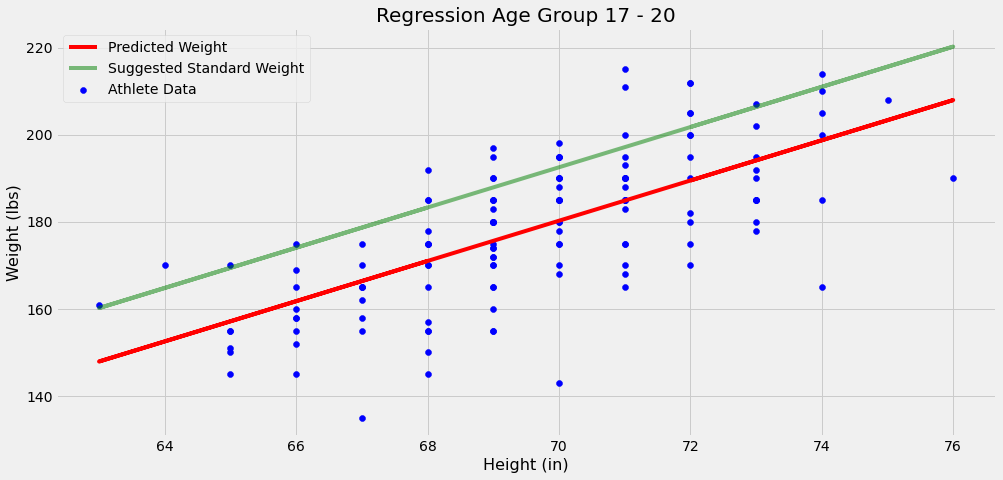

In [177]:
#resid = prediction1 - y_1
#stan = np.std(resid)
#x = np.linspace(63,76,137)
#y_2 = result1.predict(np.linspace(63,76,137))-1 * stan
#y_3 = result1.predict(np.linspace(63,76,137)) + 1 * stan

fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(range1720_df.Height, y_1, color ='blue', label = 'Athlete Data')
ax.plot(X_1['Height'], prediction1, color = 'red', label = 'Predicted Weight')
ax.plot(X_1['Height'], prediction1 + 1 * stan, color = 'green', alpha = .5,label = 'Suggested Standard Weight')
#ax.plot(X_1['Height'], prediction1 - 1 * stan, color = 'black', alpha = .4,label = 'Predicted Weight')
#ax.fill_between(x, y_2, y_3, color='grey', alpha = .5)
#ax.fill_between(X_1['Height'], prediction1 +1 * stan, prediction1, color = 'green' ,alpha = .5)
ax.set_title('Regression Age Group 17 - 20', fontdict={'fontsize':20})
ax.set_xlabel('Height (in)', fontdict={'fontsize':16})
ax.set_ylabel('Weight (lbs)', fontdict={'fontsize':16})
#ci = 0.1 * np.std(prediction1) / np.mean(prediction1)

#plt.plot(X_1['Height'],prediction1, color='black', lw=10)
#np.
#ax.fill_between(X_1['Height'], (pred-ci), (prediction1+ci), color='blue', alpha = .5)

#plt.show()
ax.legend()

In [208]:
prediction1 + 1 * stan

array([201.76657678, 211.00544109, 197.14714462, 201.76657678,
       197.14714462, 169.43055168, 160.19168736, 187.90828031,
       206.38600893, 178.66941599, 187.90828031, 187.90828031,
       174.04998383, 187.90828031, 187.90828031, 197.14714462,
       192.52771246, 187.90828031, 197.14714462, 178.66941599,
       187.90828031, 183.28884815, 187.90828031, 206.38600893,
       164.81111952, 201.76657678, 178.66941599, 187.90828031,
       187.90828031, 187.90828031, 192.52771246, 187.90828031,
       187.90828031, 178.66941599, 197.14714462, 183.28884815,
       192.52771246, 192.52771246, 174.04998383, 192.52771246,
       187.90828031, 192.52771246, 201.76657678, 192.52771246,
       187.90828031, 183.28884815, 206.38600893, 201.76657678,
       192.52771246, 192.52771246, 192.52771246, 183.28884815,
       169.43055168, 183.28884815, 183.28884815, 192.52771246,
       174.04998383, 174.04998383, 178.66941599, 197.14714462,
       201.76657678, 192.52771246, 178.66941599, 178.66

In [209]:
stan

12.27696665443956

In [210]:
X_1.describe()


,Height
count,137.000000
mean,69.642336
std,2.502167
min,63.000000
25%,68.000000
50%,70.000000
75%,71.000000
max,76.000000


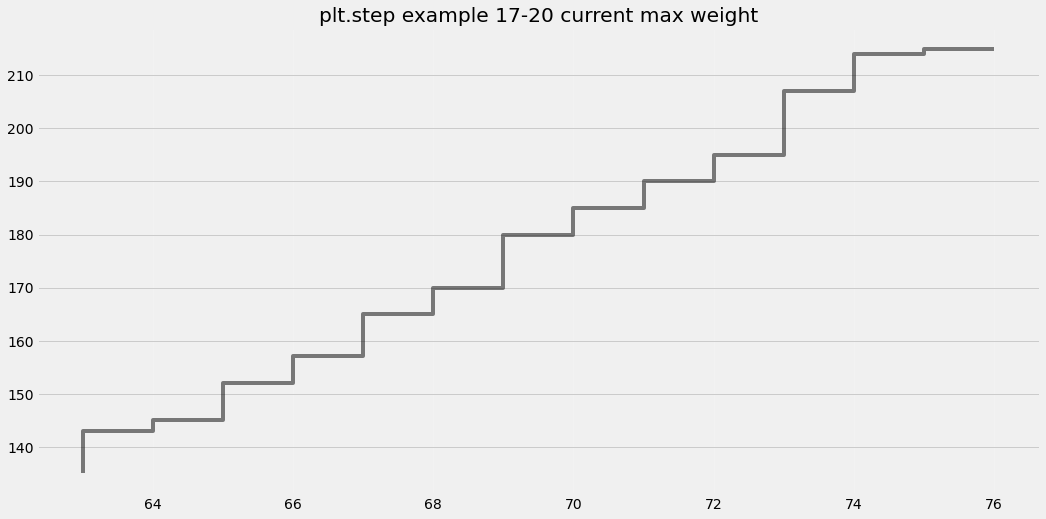

In [211]:
x = sorted(X_1['Height'])
y = sorted(y_1)
y_17_20 = [
    132,
    136,
    141,
    145,
    150,
    155,
    160,
    165,
    170,
    175,
    180,
    185,
    190,
    195,
    201,
    206,
    212,
    218,
    223,
    229,
    234,
]

plt.step(
    x, y, color="black", alpha=0.5, label="Height/ Weight Standard for 17-20"
)

plt.grid(axis="x", color="0.95")
plt.title("plt.step example 17-20 current max weight")
plt.show()

In [212]:
x

[63,
 64,
 65,
 65,
 65,
 65,
 65,
 65,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 74,
 74,
 74,
 74,
 74,
 74,
 75,
 76]

In [213]:
type(prediction1)

numpy.ndarray

In [214]:
y_2 = range2127_df['Weight']
X_2 = range2127_df[['Height']]
print(X_2)

      Height
0         69
3         69
6         72
7         69
9         64
...      ...
4974      71
4978      68
4991      65
4992      73
4993      68

[1321 rows x 1 columns]


In [215]:
model_linear2 = LinearRegression()
model_fit2 = model_linear2.fit(X_2, y_2)
prediction2 = model_fit2.predict(X_2)
print(prediction2)

[182.54937157 182.54937157 195.82643883 ... 164.84661523 200.25212791
 178.12368249]


In [216]:
print(model_fit2.intercept_, model_fit2.coef_)

-122.8231752975982 [4.42568909]


In [217]:
#Model for range2127_df
model_ols2 = smf.ols(formula = 'Weight ~ Height', data=range2127_df)
result2 = model_ols2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1113.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):          1.90e-177
Time:                        21:44:44   Log-Likelihood:                -5174.8
No. Observations:                1321   AIC:                         1.035e+04
Df Residuals:                    1319   BIC:                         1.036e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -122.8232      9.284    -13.229      0.0

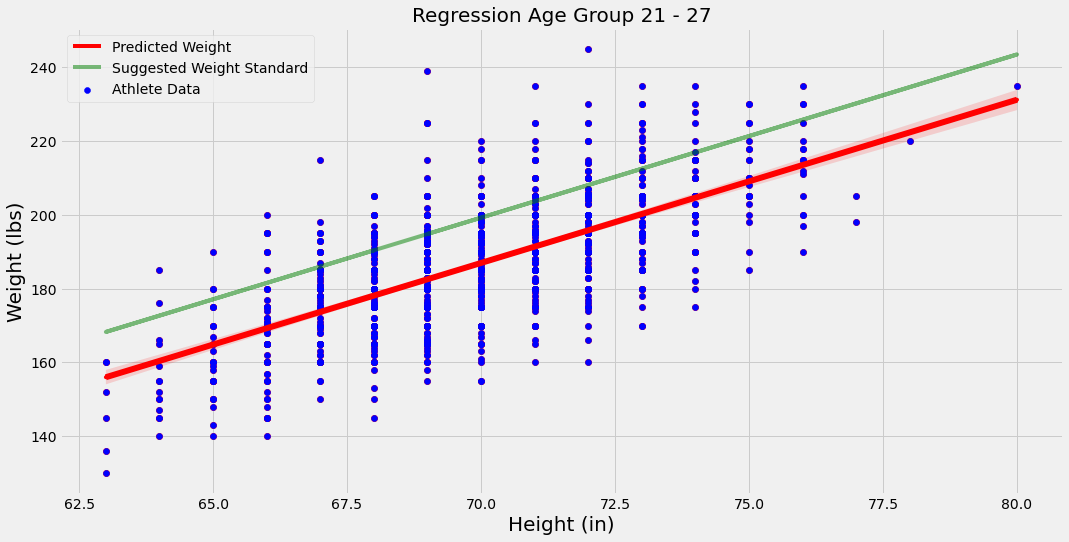

In [228]:
ax = sns.regplot(x=X_2, y=y_2, color="r")
ax.set_xlabel("Height (in)", fontsize = 20)
ax.set_ylabel("Weight (lbs)", fontsize = 20)
ax.set_title('Regression Age Group 21 - 27', fontdict={'fontsize':20})
ax.scatter(range2127_df.Height, y_2, color ='blue', label = 'Athlete Data')
ax.plot(X_2['Height'], prediction2, color = 'red', label = 'Predicted Weight')
ax.plot(X_2['Height'], prediction2 + 1 * stan, color = 'green', alpha = .5,label = 'Suggested Weight Standard')
#ax.fill_between(X_1['Height'], prediction1 + 1 * stan, prediction1, color = 'green' ,alpha = .5)
#ax.fill_between(X_1, y_est - y_err, y_est + y_err, alpha=0.2)
ax.legend()

In [230]:
resid2 = prediction2 - y_2
stan2 = np.std(resid2)
stan2

12.163345633805339

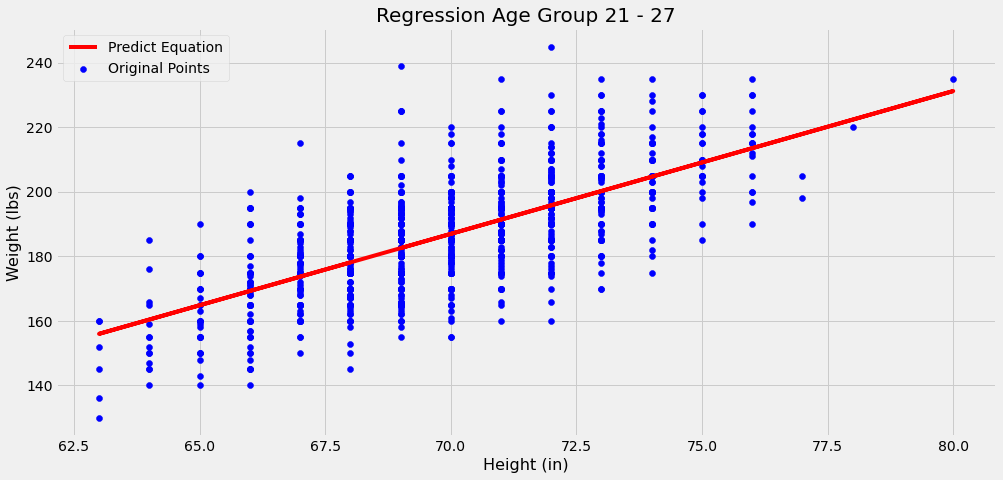

In [218]:
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(range2127_df.Height, y_2, color ='blue', label = 'Original Points')
ax.plot(X_2['Height'], prediction2, color = 'red', label = 'Predict Equation')
ax.set_title('Regression Age Group 21 - 27', fontdict={'fontsize':20})
ax.set_xlabel('Height (in)', fontdict={'fontsize':16})
ax.set_ylabel('Weight (lbs)', fontdict={'fontsize':16})
#ci = 0.1 * np.std(y_2) / np.mean(y_2)
#plt.plot(X_2, y_2, color='black', lw=7)
#plt.fill_between(X_2, (y_2-ci), (y_2+ci), color='blue', alpha=0.5)
#plt.show()
ax.legend()

In [219]:
y_3 = range2839_df['Weight']
X_3 = range2839_df[['Height']]
print(X_3)

      Height
1         69
2         73
4         69
5         67
8         67
...      ...
4995      71
4996      68
4997      67
4998      67
4999      72

[3429 rows x 1 columns]


In [220]:
model_linear3 = LinearRegression()
model_fit3 = model_linear3.fit(X_3, y_3)
prediction3 = model_fit3.predict(X_3)
print(prediction3)

[183.63112677 202.67555858 183.63112677 ... 174.10891087 174.10891087
 197.91445063]


In [221]:
print(model_fit3.intercept_, model_fit3.coef_)

-144.88532184217436 [4.76110795]


In [222]:
#Model for range2839_df
model_ols3 = smf.ols(formula = 'Weight ~ Height', data=range2839_df)
result3 = model_ols3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     3032.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:44:45   Log-Likelihood:                -13605.
No. Observations:                3429   AIC:                         2.721e+04
Df Residuals:                    3427   BIC:                         2.723e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -144.8853      6.062    -23.900      0.0

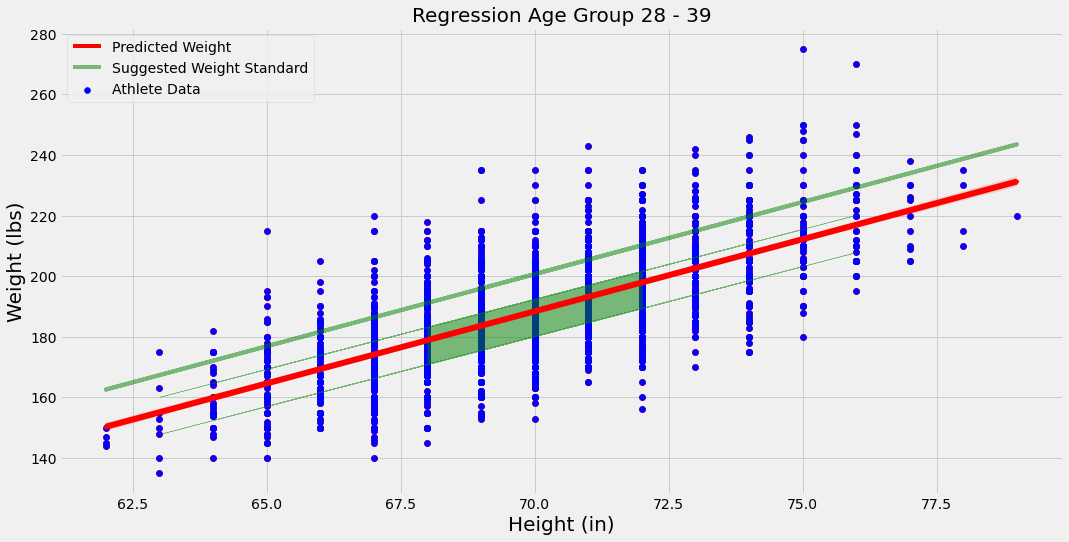

In [233]:
ax = sns.regplot(x=X_3, y=y_3, color="r")
ax.set_xlabel("Height (in)", fontsize = 20)
ax.set_ylabel("Weight (lbs)", fontsize = 20)
ax.set_title('Regression Age Group 28 - 39', fontdict={'fontsize':20})
ax.scatter(range2839_df.Height, y_3, color ='blue', label = 'Athlete Data')
ax.plot(X_3['Height'], prediction3, color = 'red', label = 'Predicted Weight')
ax.plot(X_3['Height'], prediction3 + 1 * stan, color = 'green', alpha = .5,label = 'Suggested Weight Standard')
ax.fill_between(X_1['Height'], prediction1 + 1 * stan, prediction1, color = 'green' ,alpha = .5)
#ax.fill_between(X_1, y_est - y_err, y_est + y_err, alpha=0.2)
ax.legend()

In [232]:
resid3 = prediction3 - y_3
stan3 = np.std(resid3)
stan3

12.791240042853012

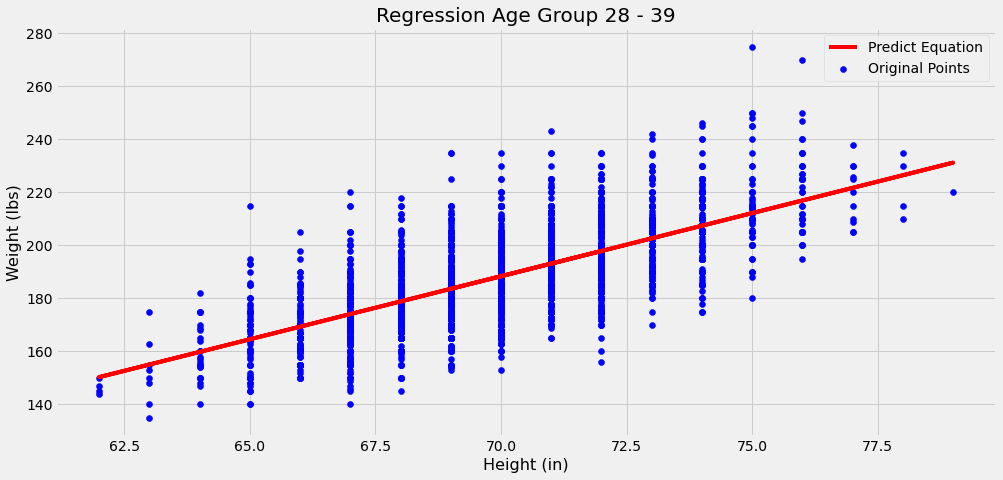

In [223]:
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(range2839_df.Height, y_3, color ='blue', label = 'Original Points')
# xvals = np.linspace(650,850,2498)
ax.plot(X_3['Height'], prediction3, color = 'red', label = 'Predict Equation')
ax.set_title('Regression Age Group 28 - 39', fontdict={'fontsize':20})
ax.set_xlabel('Height (in)', fontdict={'fontsize':16})
ax.set_ylabel('Weight (lbs)', fontdict={'fontsize':16})
ax.legend()